1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

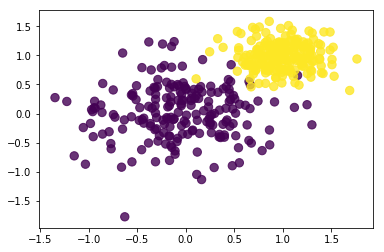

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

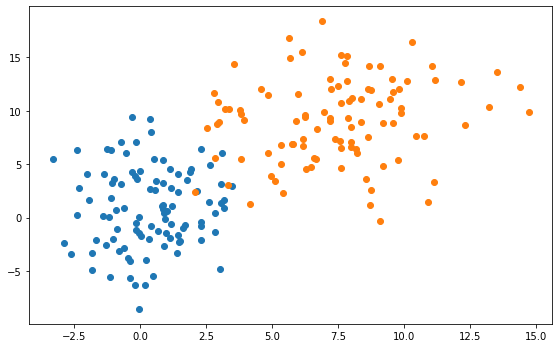

In [137]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

#setting the parameters and creating the dataframe
means = 0.,1.
stdevs= 10.,5.
N = 100

fig, ax = plt.subplots(figsize=(8,5))
fig.tight_layout()

for i in range(2):
    gaus1 = np.random.normal(np.random.uniform(means[0],stdevs[0]), np.random.uniform(means[1],stdevs[1]), 100)
    gaus2 = np.random.normal(np.random.uniform(means[0],stdevs[0]), np.random.uniform(means[1],stdevs[1]), 100)
    plt.scatter(gaus1,gaus2)

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

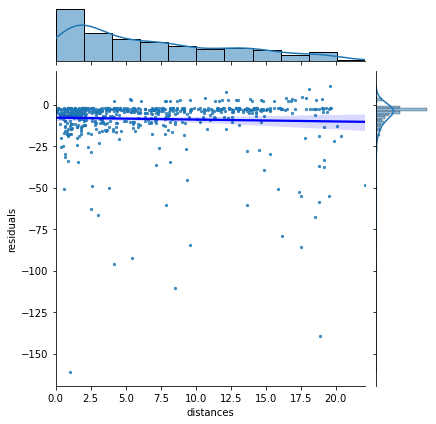

In [157]:
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/ --no-check-certificate
import pandas as pd
import numpy as np
import seaborn as sns

residuals = pd.read_pickle("data/residuals_261.pkl")
#content of file is presented as numpy ndarray, need to be converted to DataFrame
residuals = pd.DataFrame(residuals.item()) 
#dropping rows with residual absolute value under 2
res = residuals.drop(residuals[np.abs(residuals['residuals']) < 2].index).reset_index()

sns.jointplot(x = 'distances', y = 'residuals', data = res, kind = "reg", scatter_kws={"s": 5}, line_kws={"color": "blue"})
plt.show()

The error results:  [6.65665450127474, 20.311048662202143, 5.8890807998590065, 4.461971782653737, 16.429964680673113, 11.280718361629866, 10.174433653667533, 17.87516364583254, 5.774414131996885, 18.42660362039057, 4.345176182879484, 3.3625170631537618, 4.008688407696422, 8.331570327282698, 13.829077710013385, 25.90255573026317, 7.283330112585209, 25.373497467951175, 3.4329368055808516, 4.375838649777855, 2.39310638823356, 2.7303248241823455, 5.037842748196411, 3.5277624124773026, 17.249874739034954, 2.2519492927870135, 11.67555049194428, 9.401028921108054, 18.487550240334226, 25.574788380654898, 3.0687497454174126, 32.666324678482034, 9.939192321310612, 24.52427822020883, 36.44618373264155, 21.156821923173382, 3.873950036963487, nan, nan, nan]


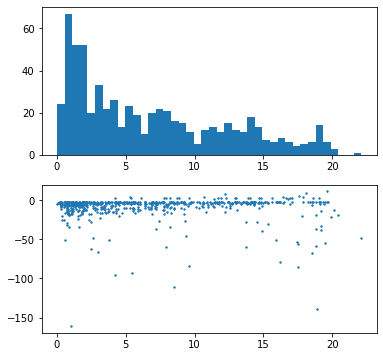

In [156]:
fig, ax = plt.subplots(2, 1,figsize=(6,6))
a,bins,_=ax[0].hist(res.distances,bins=40)

x=np.array([0.5*(bins[i]+bins[i+1]) for i in range(0,len(bins)-1)])
y = []
error = []

for i in range(0,len(bins)-1):
    e=res.loc[(res["distances"] >bins[i]) & (res["distances"] <bins[i+1])].residuals
    y.append(np.mean(e))
    error.append(np.std(e))

print("The error results: ",error)
ax[1].scatter(res.distances,res.residuals,s=2)
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


The integral of the sum results:  999.9999999999479
The integral of the histogram results:  99.0
Factor 0.09900000000000515
New gaussian: 99.0 equals to histo


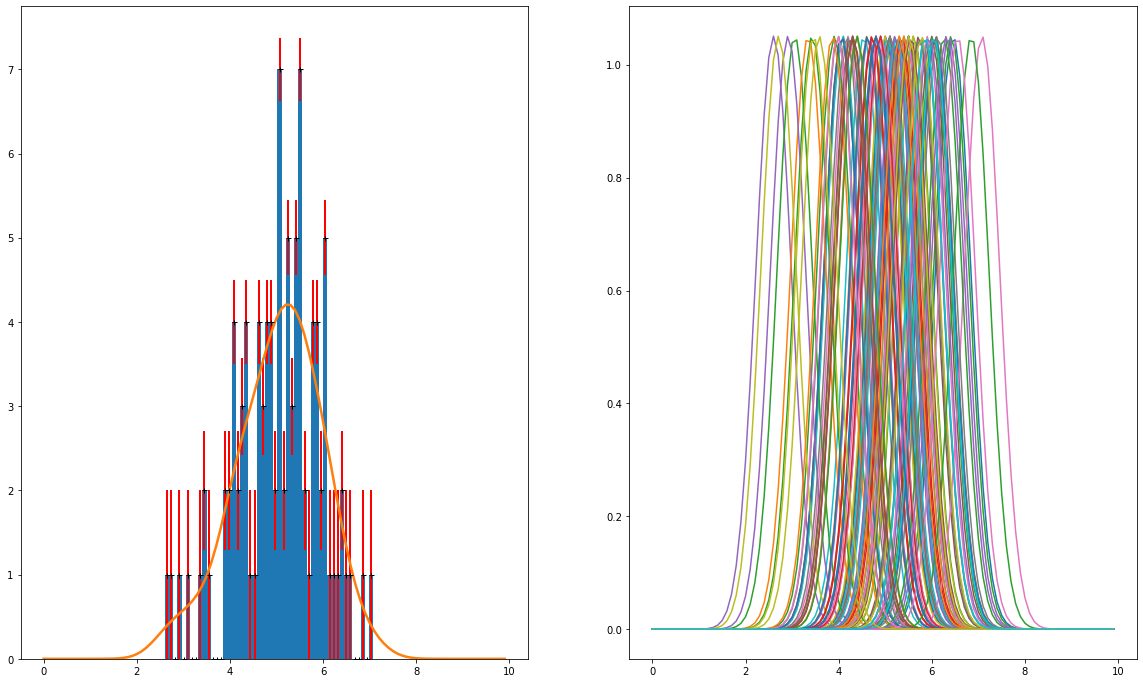

In [181]:
import numpy as np
from matplotlib import pyplot

fig, ax = plt.subplots(1, 2,figsize=(20, 12))

N = 100
x = np.random.normal(loc = 5, scale = 1, size = 100) #filling numpy array
val,bin_edge,_ = ax[0].hist(x, bins=50) #setting number of bins for the histogram
bin_center = np.array([0.5*(bin_edge[i]+bin_edge[i+1]) for i in range(0,len(bin_edge)-1)])

err = [] #setting the value of the error as poisson
for i in range(len(val)):
    if val[i] != 0:
        err.append(1/np.sqrt(val[i])) 
    else:
        err.append(0)
        
ax[0].errorbar(bin_center, val, yerr=err, fmt="+k", ecolor='red', elinewidth=2, markersize=5)


import scipy

x_ax = np.arange(0, 10, 0.1)

tot=0
for i in x:
    sigma = 1.06*np.std(x)*x.size**(-1/5) #function given of standard deviation
    norm = scipy.stats.norm.pdf(x_ax, i, sigma)
    ax[1].plot(x_ax,norm)
    tot += norm
    
integral = scipy.integrate.trapz(tot)
print("The integral of the sum results: ",integral)

intX = scipy.integrate.trapz(val)
print("The integral of the histogram results: ",intX)

f = (intX/integral)
print("Factor",f)
                    
T = tot[:]*f
intT = scipy.integrate.trapz(T)
print("New gaussian:",intT,"equals to histo")
ax[0].plot(x_ax,T, linewidth = 2.5)

plt.show()